In [3]:
import matplotlib.pyplot as plt  
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import os 
import sklearn
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sys


import gzip
import os
import copy
import random


from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
import seaborn as sns

from sklearn.model_selection import GridSearchCV
from matplotlib.pyplot import figure

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz 


from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import AdaBoostRegressor

In [4]:
import pandas
pandas.set_option('display.max_columns', 10)
pandas.set_option('display.width', 350)
  
#read from google drive
data=pandas.read_csv("https://drive.google.com/uc?export=download&id=1LU5be_H1TD2Pp1OmI202to3YyKo9AzFY")
  
print(data.head())

  country  age  new_user source  total_pages_visited  converted
0      UK   25         1    Ads                    1          0
1      US   23         1    Seo                    5          0
2      US   28         1    Seo                    4          0
3   China   39         1    Seo                    5          0
4      US   30         1    Seo                    6          0


In [3]:
print(data.groupby(['country']).size())


country
China       76602
Germany     13056
UK          48450
US         178092
dtype: int64


In [5]:
data.groupby(['source']).size()

source
Ads        88740
Direct     72420
Seo       155040
dtype: int64

In [6]:
data.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [5]:
df=pd.DataFrame(data)

In [6]:
#sorted(df['age'].unique(),reverse=True)

In [7]:
df=df[df['age']<111]

In [8]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [9]:
rcParams.update({'figure.autolayout': True})


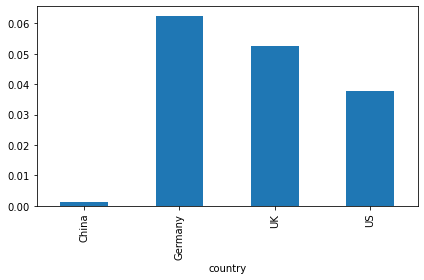

In [10]:
df.groupby(['country'])['converted'].mean().plot.bar()
plt.show()

<AxesSubplot:xlabel='total_pages_visited'>

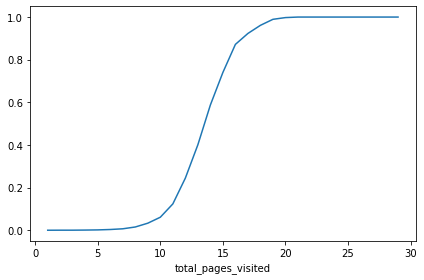

In [25]:
df.groupby(['total_pages_visited'])['converted'].mean().plot()

# meachine learning part
# random forest need little time to optimize, strong with outliers
and irrelevant variables, continuouse and discrete variables 

In [11]:
df_dummy=pd.get_dummies(df,drop_first=True)

In [28]:
df_dummy.head()

,age,new_user,total_pages_visited,converted,country_Germany,country_UK,country_US,source_Direct,source_Seo
0,25,1,1,0,0,1,0,0,0
1,23,1,5,0,0,0,1,0,1
2,28,1,4,0,0,0,1,0,1
3,39,1,5,0,0,0,0,0,1
4,30,1,6,0,0,0,1,0,1


In [29]:
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [12]:
from sklearn.ensemble import RandomForestClassifier


In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [14]:
train, test = train_test_split(df_dummy, test_size=0.34)

In [33]:
rf = RandomForestClassifier(n_estimators=100,max_features=3, oob_score=True)

In [34]:
rf.fit(train.drop('converted', axis=1),train['converted'])

RandomForestClassifier(max_features=3, oob_score=True)

In [35]:
print('OOB accuracy is', rf.oob_score_)

OOB accuracy is 0.9844602041305285


In [36]:
confusion_matrix(train['converted'],rf.oob_decision_function_[:,1].round(),labels=[0,1])

array([[200809,   1065],
       [  2178,   4638]])

In [37]:
rf.score(test.drop('converted', axis=1), test['converted'])

0.9842058265431409

In [38]:
confusion_matrix(test['converted'],rf.predict(test.drop('converted', axis=1)),labels=[0,1])

array([[103516,    610],
       [  1088,   2294]])

## check variable importance 


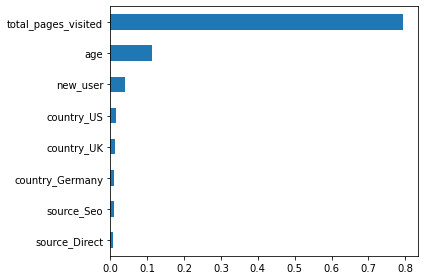

In [40]:
feat_importance=pd.Series(rf.feature_importances_,index=train.drop('converted', axis=1).columns)
feat_importance.sort_values().plot(kind='barh')
plt.show()

## build the model without total page visited , since it's most weight and less actional

In [15]:
rf1=RandomForestClassifier(n_estimators=100, max_features=3, oob_score=True,class_weight={0:1, 1:10})

In [16]:
rf1.fit(train.drop(['converted','total_pages_visited'], axis=1), train['converted'])

RandomForestClassifier(class_weight={0: 1, 1: 10}, max_features=3,
                       oob_score=True)

In [18]:
rf1.oob_score_


0.8920935358665963

In [46]:
pandas.DataFrame(confusion_matrix(train['converted'], rf1.oob_decision_function_[:,1].round(), labels=[0, 1]))


,0,1
0,182455,19419
1,3672,3144


In [47]:
rf1.score(test.drop(['converted','total_pages_visited'], axis=1), test['converted'])

0.8868735349927447

In [49]:
confusion_matrix(test['converted'], rf1.predict(test.drop(['converted','total_pages_visited'], axis=1)))

array([[93848, 10278],
       [ 1884,  1498]])

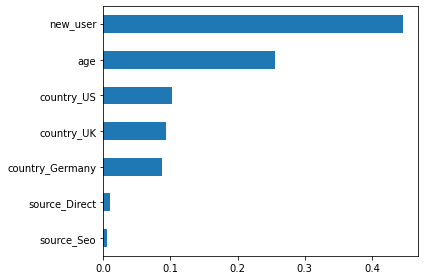

In [53]:
feat_importance1=pd.Series(rf1.feature_importances_,index=train.drop(['converted','total_pages_visited'], axis=1).columns)
feat_importance1.sort_values().plot(kind='barh')
plt.show()

# new user is most imporatance one, even more importance than age

## Let’s check partial dependence plots for the 4 vars:



In [1]:
from pdpbox import pdp, info_plots


In [7]:
#conda install -c conda-forge -y pdpbox


Solving environment: done

## Package Plan ##

  environment location: /Users/kaylaxue/anaconda3

  added / updated specs:
    - pdpbox


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.10.3               |   py38h50d1736_0         3.1 MB  conda-forge
    pdpbox-0.2.1               |     pyhd8ed1ab_0        22.2 MB  conda-forge
    ------------------------------------------------------------
                                           Total:        25.2 MB

The following NEW packages will be INSTALLED:

  pdpbox             conda-forge/noarch::pdpbox-0.2.1-pyhd8ed1ab_0

The following packages will be UPDATED:

  conda                               4.10.1-py38h50d1736_0 --> 4.10.3-py38h50d1736_0



pdpbox-0.2.1         | 22.2 MB   | ##################################### | 100% 
conda-4.10.3         | 3.1 MB    | ##################################### | 100% 
Preparing transaction: d

In [20]:
pdp_iso =  pdp.pdp_isolate(model=rf1, dataset=train.drop(['converted','total_pages_visited'], axis=1),
                          model_features=list(train.drop(['converted','total_pages_visited'], axis=1)),
                           feature='age', num_grid_points=50)

In [21]:
pdp_iso

In [22]:
pdp_df=pd.Series(pdp_iso.pdp, index=pdp_iso.feature_grids)


In [23]:
pdp_df.head()

17.0    0.324656
18.0    0.310109
19.0    0.285170
20.0    0.286612
21.0    0.295856
dtype: float64

<AxesSubplot:title={'center':'Age'}>

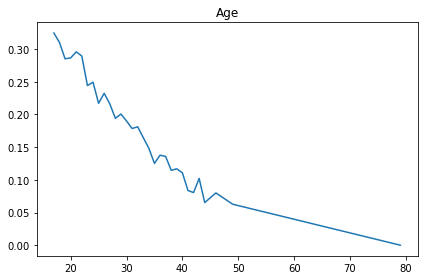

In [25]:
pdp_df.plot(title="Age")

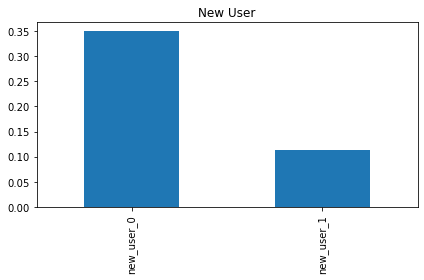

In [27]:
#new user
pdp_iso = pdp.pdp_isolate( model=rf1, 
                          dataset=train.drop(['converted', 'total_pages_visited'], axis=1),      
                          model_features=list(train.drop(['converted', 'total_pages_visited'], axis=1)), 
                          feature='new_user', 
                          num_grid_points=50)
pdp_dataset = pandas.Series(pdp_iso.pdp, index=pdp_iso.display_columns)
pdp_dataset.sort_values(ascending=False).plot(kind='bar', title='New User')
plt.show()

## decision tree

In [34]:
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source
from sklearn import tree
import graphviz 

In [36]:
tree_m= DecisionTreeClassifier(max_depth=2, class_weight={0:1, 1:10})
tree_m.fit(train.drop(['converted', 'total_pages_visited'], axis=1), train['converted'])

DecisionTreeClassifier(class_weight={0: 1, 1: 10}, max_depth=2)

In [32]:
#visualize it
export_graphviz(tree, out_file="tree_conversion.dot", feature_names=train.drop(['converted', 'total_pages_visited'], axis=1).columns, proportion=True, rotate=True)
with open("tree_conversion.dot") as f:
    dot_graph = f.read()
  
s = Source.from_file("tree_conversion.dot")
s.view()

'tree_conversion.dot.pdf'

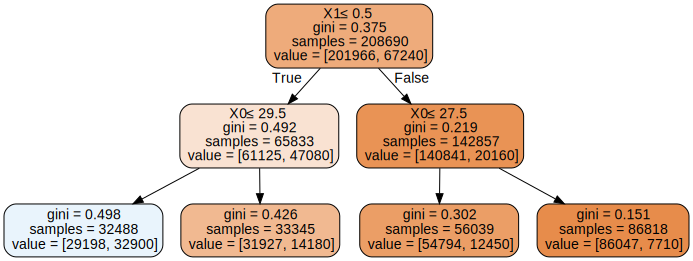

In [37]:
dot_data = tree.export_graphviz(tree_m, out_file=None, 
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 